### In this notebook I'll attempt to describe the whats-and-hows of Linear Regression. 
This part consists of explanation of the steps that need to be taken to analyze and build the algorithm.
Even though, Linear Regression might be the easiest one to learn, it <b>does require</b> extensive knowledge
of statistics and statistical analysis.
<h3>Steps</h3>
<li>analyze the dataset & look for insights</li>
<li>clean up & make sure everything is accurate</li>
<li>determine the outliers' impact (if necessary remove them)</li>
<li>check collinearity</li>
<li>fit & predict without scaling/normalizing/outliers' reduction</li>
<li>fit & predict with scaling/normalizing/outliers' reduction</li>
<li>regularize if necessary</li>

### Let's look at the famous dataset - California Housing


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from statsmodels.api import OLS

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.linear_model import LinearRegression

%matplotlib inline
sns.set()

In [2]:
df = fetch_california_housing()
print(df.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
california = pd.DataFrame(df.data, columns=df.feature_names)
california['Price'] = df.target
print(california.info())
california.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.02381,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.97188,2401.0,2.109842,37.86,-122.22,3.585


In [4]:
# the reason why I didn't include .values, because I want the feature names to be present in statsmodels' summary
X = california.iloc[:, :-1]
y = california.iloc[:, -1]
print(X.shape, y.shape)

(20640, 8) (20640,)


<h3>Things to look out for when using statsmodels</h3>
<li>R2 is goodness of fit (shows how much better the model is in comparison to the mean)</li>
<li>Adjusted R2 shows how much data can be explained with features</li>
<li>p-values are <b>best friends</b>, they hint at the insignificant features. If it is <= 0.05 - they are <b>important</b></li>
<li>Cond No is also an important aspect since it show if the data is <b>unstable</b>. Rule of thumb: it cannot exceed 30</li>

<b>IMPORTANT</b>: the bigger the difference is between R2 & Adjusted R2, the worse! If it's exceeds 20%, it a <b>clear sign of redundancy</b>

In [5]:
ols = OLS(endog=y, exog=X).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.892
Model:                            OLS   Adj. R-squared (uncentered):              0.892
Method:                 Least Squares   F-statistic:                          2.137e+04
Date:                Tue, 16 Mar 2021   Prob (F-statistic):                        0.00
Time:                        11:09:15   Log-Likelihood:                         -24087.
No. Observations:               20640   AIC:                                  4.819e+04
Df Residuals:                   20632   BIC:                                  4.825e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MedInc         0.5135      0.004    120.594      0.000       0.505       0.522
HouseAge       0.0157      0.000     33.727      0.000       0.015       0.017
AveRooms      -0.1825      0.006    -29.673      0.000      -0.195      -0.170
AveBedrms      0.8651      0.030     28.927      0.000       0.806       0.924
Population  7.792e-06   5.09e-06      1.530      0.126   -2.19e-06    1.78e-05
AveOccup      -0.0047      0.001     -8.987      0.000      -0.006      -0.004
Latitude      -0.0639      0.004    -17.826      0.000      -0.071      -0.057
Longitude     -0.0164      0.001    -14.381      0.000      -0.019      -0.014
==============================================================================
Omnibus:                     4353.392   Durbin-Watson:                   0.909
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14087.489
Skew:                           1.069   Prob(JB):                         0.00
Kurtosis:                       6.436   Cond. No.                     1.03e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
from sklearn.linear_model import LinearRegression

ls = LinearRegression().fit(X, y)
ls_score1 = ls.score(X, y)
print(ls_score1)

0.606232685199805


<h3>What to look at?</h3>
We can clearly see the goodness of fit, R2, is 89.2% and is identical to Adjusted R2. By looking at p-values, P > |t|, we can see that Population is way off limit (0.05), which is a sign to get rid of it. Also, Cond No is way too big: 10,300. If the data could scream at as, it would do so (actually, <b>it is doing</b> so).

First, let's remove Populations & see what happens.


In [7]:
X.drop('Population', axis=1, inplace=True)
X.columns  # sanity check

c:\users\dinar\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:4162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'AveOccup', 'Latitude',
       'Longitude'],
      dtype='object')

In [8]:
ols = OLS(endog=y, exog=X).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.892
Model:                            OLS   Adj. R-squared (uncentered):              0.892
Method:                 Least Squares   F-statistic:                          2.442e+04
Date:                Tue, 16 Mar 2021   Prob (F-statistic):                        0.00
Time:                        11:09:15   Log-Likelihood:                         -24088.
No. Observations:               20640   AIC:                                  4.819e+04
Df Residuals:                   20633   BIC:                                  4.825e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MedInc         0.5135      0.004    120.584      0.000       0.505       0.522
HouseAge       0.0154      0.000     35.078      0.000       0.015       0.016
AveRooms      -0.1830      0.006    -29.784      0.000      -0.195      -0.171
AveBedrms      0.8657      0.030     28.949      0.000       0.807       0.924
AveOccup      -0.0046      0.001     -8.893      0.000      -0.006      -0.004
Latitude      -0.0647      0.004    -18.201      0.000      -0.072      -0.058
Longitude     -0.0168      0.001    -15.089      0.000      -0.019      -0.015
==============================================================================
Omnibus:                     4339.028   Durbin-Watson:                   0.909
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14057.657
Skew:                           1.065   Prob(JB):                         0.00
Kurtosis:                       6.436   Cond. No.                         725.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<h3>WOAH, look at that!</h3>
<li>R2 & Adjusted R2 haven't changed (which is incredible that we weren't punished for kicking out population)</li>
<li>Cond No <b>drastically decreased</b> from over 10k to 725!</li>

In [9]:
from sklearn.linear_model import LinearRegression

ls = LinearRegression().fit(X, y)
ls_score2 = ls.score(X, y)

<h3>Now, since we still have a high Cond No., let's look at Correlation Matrix</h3>

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'AveOccup', 'Latitude', 'Longitude']


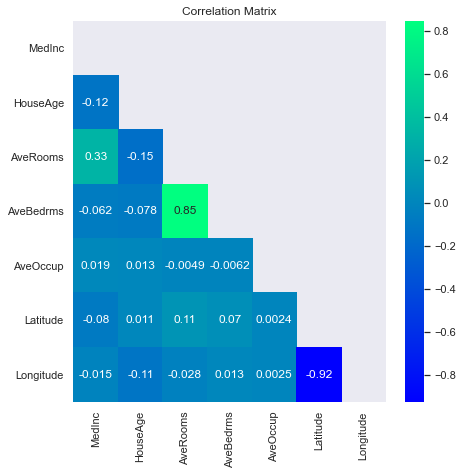

In [10]:
features = X.columns.tolist()
print(features)

def show_correlations(predictors, dataset):
    mask = np.triu(dataset.corr())
    plt.figure(figsize=(7, 7))
    plt.title('Correlation Matrix')
    sns.heatmap(dataset.corr(), annot=True, cmap='winter', mask=mask)
    plt.show()

show_correlations(features, X)

<h3>Eigenvalues & Eigenvectors to the rescue!</h3>

To see how things are correlated, we can use <b>eigenvalues</b> and <b>eigenvectors</b>. What they do is iteratively add new features and check correlations. 
<li>Eigenvalues </li>
<li>Eigenvectors </li>

<h3>What to look at?</h3>
Always check for the values that <b>differ a lot | close to 0</b>. "Near zero values can represent a real problem for normal equations and other optimization methods based on matrix inversion. Small values represent a high but not critical source of multicollinearity" (Massaron, L. & Boschetti, A., 2016, p. 133)

When you run the cell below, you will see that values at indices 2 & 3 are distinctive. Let's take a closer look. 

*Reference: Massaron, L. & Boschetti, A. (2016, February). <i>Regression analysis with python</i>. Packt Publishing Ltd. 

In [11]:
correlation = np.corrcoef(X, rowvar=False)  # rowvar is set to False since our data is presented as columns
eigenvalues, eigenvectors = np.linalg.eig(correlation)

print(eigenvalues)
print('\n==============\n')

def show_eigenvectors(index):
    results = eigenvectors[:, index]
    eigen = pd.DataFrame({'features': features, 'results': results})
    
    print(f'Features for: {features[index].upper()}\n\n', eigen[eigen.results < eigen.results.median()])
    print('\n==============\n')

show_eigenvectors(2)
show_eigenvectors(3)
show_eigenvectors(5)

[1.99986184 1.87105346 0.04572752 0.08240656 1.09107259 0.90680178
 1.00307626]


Features for: AVEROOMS

    features   results
1  HouseAge  0.040014
2  AveRooms -0.464350
4  AveOccup -0.007936


Features for: AVEBEDRMS

     features   results
2   AveRooms -0.524789
5   Latitude -0.436482
6  Longitude -0.468898


Features for: LATITUDE

    features   results
0    MedInc -0.507729
1  HouseAge -0.815835
2  AveRooms -0.125791




<h3>Standardize the dataset</h3>
After running standardization & linear regression and looking at the coefficients, we can see the most important
variables (but it's not enough, we need <b>regularization</b>). Nevertheless, let's see how the coefficients are
interpreted without and with standardization.

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

scaler = StandardScaler()
linreg = LinearRegression(normalize=False, fit_intercept=True)
pipeline = make_pipeline(scaler, linreg)

# unstandardized
linreg.fit(X, y)
for coef, var in sorted(zip(map(abs, linreg.coef_), features), reverse=True):
    print(coef, var)

print('\n==============\n')


# standardized
pipeline.fit(X, y)
for coef, var in sorted(zip(map(abs, pipeline.steps[1][1].coef_), features), reverse=True):
    print(coef, var)



0.6449021952418085 AveBedrms
0.4367597478036242 MedInc
0.43404215355951803 Longitude
0.42069941655554993 Latitude
0.10713405779069182 AveRooms
0.009555467799549803 HouseAge
0.003819327912848975 AveOccup


0.8985721588732175 Latitude
0.8695961574299772 Longitude
0.8297455532459809 MedInc
0.3056187480723477 AveBedrms
0.2650617867995122 AveRooms
0.12025797716985952 HouseAge
0.03966676804251057 AveOccup


## Partial R2

In [24]:
from sklearn.metrics import r2_score

linreg = LinearRegression(normalize=False, fit_intercept=True)

def r2_est(X, y):
    return r2_score(y, linreg.fit(X, y).predict(X))

print(f'Baseline R2: {round(r2_est(X, y), 3)}')


r2_impact = list()
for j in range(X.shape[1]):
    selection = [i for i in range(X.shape[1]) if i != j]
    r2_impact.append(((r2_est(X, y) - r2_est(X.values[:, selection], y)), features[j]))
for imp, varname in sorted(r2_impact, reverse=True):
    print(round(imp, 3), varname)

Baseline R2: 0.606
0.207 MedInc
0.066 Latitude
0.064 Longitude
0.01 AveBedrms
0.01 HouseAge
0.006 AveRooms
0.001 AveOccup
